**F78DS Coursework 2** <br>
**Connor McCaffery** <br>
**H00190287**

# Introduction

This project explores model building and validation in machine learning, focusing on key concepts such as supervised vs. unsupervised learning, the distinction between labels and features, and the differences between binary and multiclass classification. Our project will use a dataset that consists of student essays scored from 1 to 6, alongside various features such as word count and punctuation usage.<br>
<br>
Our goal is to develop a machine learning model capable of accurately predicting essay scores for unseen data. We will experiment with classification algorithms, including Naive Bayes and Random Forest, and evaluate their performance using the Quadratic Weighted Kappa score. A crucial aspect of this study is feature selection, as identifying the most relevant features can significantly enhance model accuracy. Additionally, we will employ cross-validation techniques to improve model robustness and generalisability. To gain deeper insights into our model’s performance, we will visualise results using confusion matrices. Through this project, we aim to demonstrate effective techniques for handling data in machine learning while refining predictive models for automated essay scoring. The first thing to do is to import the libraries that will be required for this project.

# Importing Libraries

**Matplotlib**

In [1]:
from matplotlib import pyplot as plt

We will be using pyplot a few times throughout this project. The main use of this library will be to contruct confusion matrices.

**Pandas**

In [2]:
import pandas as pd

Pandas is essential for data analysis, offering powerful DataFrame functionality for organising and manipulating structured data. It allows us to efficiently read csv files, and also will come in handy during our feature selection part of the project. 

**Scikit-Learn**

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

We will be utilising scikit-learn extensively throughout this project. It will play a key role in several tasks, including performing z-score scaling, efficiently splitting the data into training and testing sets, and implementing the Gaussian Naive Bayes model. Additionally, scikit-learn will help us construct confusion matrices, calculate evaluation metrics such as Cohen's Kappa and accuracy scores, and ultimately apply the Random Forest algorithm for making predictions.

Now we have imported all of the necessary libraries for this project.

## Read the file

Using the Pandas library, we can read the csv file to begin our project:

In [4]:
data = pd.read_csv("F78DS-Essay-Features.csv")
data.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


This dataset is derived from a set of essays and is used to describe the essay features in numeric information. Each essay is scored from 1 to 6, with 6 being best. Above is the first five entries of our dataframe so that we can observe the features and label.

## Supervised Learning

Supervised learning is a machine learning technique where models are trained using labeled data, meaning that each input in the training set is paired with the correct output or label. This approach "teaches" the model to identify patterns or relationships between the inputs and their corresponding outputs. The goal of supervised learning is to enable the model to learn from these examples so that it can accurately predict the output for new, unseen inputs. Essentially, the aim is to create models that can generalise well and make reliable predictions on future data.

## Data Labelling

Data labeling is the process of annotating data with meaningful tags or labels that provide context, allowing machine learning models to recognise patterns and make accurate predictions. This involves categorising or tagging various types of data - such as images, text, audio, or video - with relevant labels that describe their content or characteristics. By systematically labeling data, machine learning algorithms can learn from these annotations to improve model accuracy, identify trends, and enhance decision-making across a range of applications, including natural language processing, computer vision, and predictive analytics.

## Training and Test Datasets

The training dataset is a large sample of data used to train a machine learning model, allowing the algorithm to learn and build an effective model. The test dataset, typically a smaller portion, is used to evaluate the model's performance in an unbiased manner after it has been fully trained. The evaluation process involves calculating a measurable metric, often referred to as accuracy. The test dataset should only be used once the model has been trained with the training and/or validation datasets, ensuring that the evaluation reflects the model’s ability to generalise to unseen data.

## Separating the features and the label

Features are the input variables used to make predictions, while the label is the target variable that you want to predict. In the code below, we remove the "score" column from the dataset since it represents the label. This step is essential for splitting the data into training and test sets, ensuring an unbiased evaluation of the model's performance. If we don't separate the label from the features, the model could mistakenly treat the label as an additional input feature, which would lead to incorrect training and potentially skew the results.

## Feature Selection

Feature selection is the process of identifying and selecting the most relevant features from a dataset to improve the performance of a machine learning model. By removing irrelevant, redundant, or highly correlated features, we can reduce the complexity of the model, decrease overfitting, and potentially increase the model's accuracy.

In [5]:
data.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [6]:
data_features = data.drop(columns=["score", "chars", "punctuations"]) 
data_label = data["score"] 

Since the "punctuations" column contains only the value 0 or 1, it may not provide enough variation to be useful for our machine learning model. A value of 0 likely indicates the absence of punctuation, while a value of 1 signifies its presence. However, this binary representation may not capture the complexity of punctuation usage, such as frequency or diversity, which could be more informative for essay scoring. <br>
<br>
One key aspect of feature selection is removing correlated features. When two or more features in the dataset are highly correlated, they essentially provide the same information to the model. This can cause instability in the model, making it difficult to interpret and affecting the accuracy of predictions. By removing one of the correlated features, we reduce redundancy and allow the model to focus on the most important, non-redundant features.
<br>
Intuitively, word count and character count are often correlated because longer essays typically contain more characters. To confirm this relationship, we can construct a scatterplot to visually examine the correlation between these two variables. A scatterplot will plot the word count on the x axis and the character count on the y axis, helping us observe any patterns or trends. If the points form a linear pattern, it would suggest a strong correlation between word count and character count, confirming our intuition. 

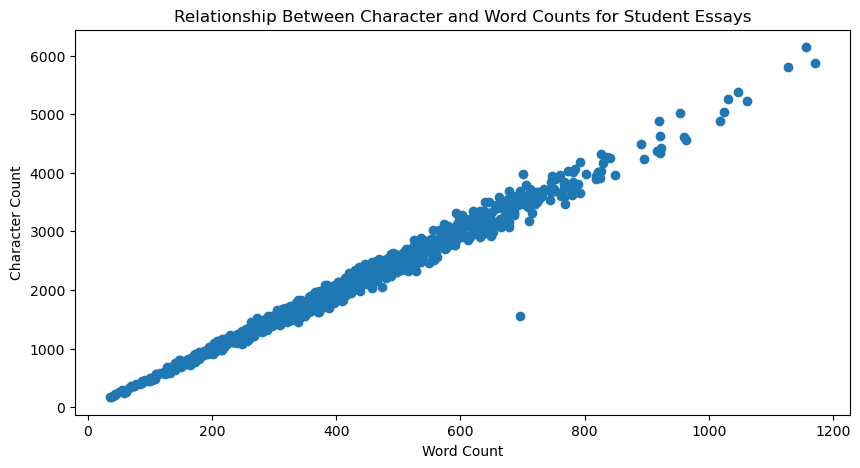

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(data['words'], data['chars'])
plt.title('Relationship Between Character and Word Counts for Student Essays')
plt.xlabel("Word Count")
plt.ylabel("Character Count")
plt.show()

The scatterplot demonstrates a strong positive linear association between the number of words and the number of characters in an essay. Given this redundancy, we will remove the "chars" column from our feature DataFrame, as both variables convey essentially the same information. This is particularly important for methods like Naive Bayes, which assume feature independence - an assumption that would be violated if both were included. We will see more on this later. We do not believe that there are any other highly correlated features, so we will only be removing "chars". 

## Splitting the data for training and testing

Again, using scikit-learn, we can efficiently split each dataframe into two parts: one for training the model and the other for testing it. We have chosen a test size of 0.225, as through some trial and error, we’ve determined that this proportion provides the best balance for splitting this particular dataset. This allows us to ensure that the model is trained on a sufficient amount of data while still having enough data for an unbiased evaluation.

In [8]:
data_features_train, data_features_test, data_label_train, data_label_test = train_test_split(data_features, data_label, test_size=0.225)

It is essential, given that our data is finite, to choose an appropriate split size. We need to strike a balance between having enough data to effectively train the model and ensuring there is sufficient data remaining to test and evaluate the model’s accuracy. This balance helps avoid overfitting and ensures that the model is properly validated on unseen data.

## Binary and Multi-class Classification

There are two primary types of classification tasks in machine learning: binary classification and multi-class classification. <br>
<br>
In binary classification, the dataset is divided into exactly two distinct classes. The goal of the binary classifier is to categorise the data into one of these two classes. This is commonly used in scenarios where there are only two possible outcomes. Examples of binary classification tasks include predicting whether a patient has a certain disease, categorised as "positive" or "negative". Other typical examples could include "Yes" vs "No" or "True" vs "False". <br>
<br>
On the other hand, multi-class classification involves categorising the dataset into more than two classes, meaning that there are multiple possible labels. In multi-class classification, the goal is to assign each instance to one of several classes. This type of classification is used in more complex scenarios where the data falls into one of multiple categories. For example, classifying images of animals into different species or breeds, such as distinguishing between "dog", "cat", or "bird". Another example could be classifying types of fruit, where the categories might include "apple", "banana", "orange", and so on. <br>
<br>
In summary, binary classification deals with two possible outcomes, while multi-class classification deals with multiple outcomes, allowing for more complex categorisation tasks. In this project, since the essays are scored on a scale from 1 to 6, we will be performing multi-class classification. This means that the model will be trained to predict one of six possible scores for each essay, where the score represents the quality of the essay as classified into one of the six distinct categories. The goal is to build a model capable of accurately predicting which score an essay should receive based on its features.

## Preparation for Naive Bayes (NB) Classification

Before applying multi-class Naive Bayes (NB) classification, we need to normalise our data. The StandardScaler() function is used to scale the feature columns so that each column has a mean of 0, a variance of 1, and is normally distributed. This is important because Naive Bayes classifiers assume that each feature is independent and follows a normal distribution. By using StandardScaler(), we ensure that the data is standardised, which helps improve the performance of the classifier. <br>
There are three common methods for normalising numerical data:

    1. Linear scaling: Rescales the data to a fixed range, typically between 0 and 1.

    2. Z-score scaling: Subtracts the mean from each feature and divides by the standard deviation, so the data has a mean of 0 and variance of 1.

    3. Log scaling: Applies the logarithm to values, which helps to reduce skewed distributions and manage extreme values.

For this project, we will use Z-score scaling with StandardScaler(), which standardises the features and ensures they have a mean of 0 and a standard deviation of 1. This method aligns well with the assumptions of the Naive Bayes classifier. We may also use log scaling if the data is highly skewed, to prevent issues like underflow or numerical instability during calculations.

In [9]:
sc = StandardScaler()
data_features_train_scaled = sc.fit_transform(data_features_train)
data_features_test_scaled = sc.transform(data_features_test)

However, we don't scale the test data separately. Instead, we use the scaling parameters (mean and standard deviation) derived from the training data to transform the test data. This is because the model should be tested on data that it hasn’t seen during training, and scaling the test data independently could lead to discrepancies in how the model interprets new data. By applying the same scaling parameters (mean and standard deviation) to the test data as used for the training data, we maintain consistency. <br>
Additionally, for discrete data, like categorical variables or class labels, scaling is not typically necessary. Scaling only applies to continuous numerical features, where the magnitude of the values can affect the model’s behaviour. Discrete data, such as class labels or binary features, is not sensitive to scaling because their values are distinct and don't rely on their scale to convey information. Hence, we don't scale test data features separately to avoid introducing inconsistencies.

## What is the Naive Bayes classifier?

The Naive Bayes (NB) classifier is a supervised machine learning algorithm used for classification tasks. It is based on Bayes' Theorem, which calculates probabilities to predict the likelihood of different classes given the features of the data. The core idea behind the Naive Bayes classifier is to compute the probability of each class, conditioned on the features, and choose the class with the highest probability. <br>
<br>
Naive Bayes is a simple yet effective probabilistic classifier that works well with a relatively small number of parameters, making it computationally efficient and faster compared to other classification algorithms. It is called "naive" because it makes a strong assumption that the features used for prediction are independent of each other, meaning the presence of one feature does not affect the presence of another. This assumption simplifies the model, even though in reality, some features might be correlated. Despite this, Naive Bayes often performs surprisingly well, particularly in high-dimensional datasets and applications like spam filtering and text classification. <br>
<br>
The Naive Bayes classifier is valued for its simplicity, speed, and effectiveness in situations where feature independence can be reasonably assumed or where the model is robust enough to handle correlations between features.

The NB makes a number of assumptions on each feature: <br>

    1. Feature independence: This means that when we are trying to classify something, we assume that each feature (or piece of information) in the data does not affect any other feature.
    
    2. Continuous features are normally distributed: If a feature is continuous, then it is assumed to be normally distributed within each class.
    
    3. Discrete features have multinomial distributions: If a feature is discrete, then it is assumed to have a multinomial distribution within each class.
    
    4. Features are equally important: All features are assumed to contribute equally to the prediction of the class label.
    
    5. No missing data: The data should not contain any missing values.

## Different Naive Bayes Models

There are four main types of Naive Bayes (NB) models, each suited for different types of data:

    1. Gaussian Naive Bayes: Gaussian Naive Bayes is used when the features are continuous and are assumed to follow a normal (Gaussian) distribution. This model is commonly applied in scenarios where the data is continuous and the distribution of the feature values within each class is expected to resemble a bell curve.

    2. Multinomial Naive Bayes: Multinomial Naive Bayes is typically used when features represent the frequency of events, such as the number of times a specific word appears in a document. This model is especially effective in text classification tasks, such as spam detection or sentiment analysis, where term frequencies or word counts play a critical role in distinguishing between classes.

    3. Bernoulli Naive Bayes: Bernoulli Naive Bayes is applied when the features are binary—indicating the presence or absence of a certain characteristic. In text classification, this is useful when you care more about whether a word appears in a document, rather than its frequency. For example, in a document classification task, it would consider whether a specific word is present (1) or absent (0) in the document.

    4. Categorical Naive Bayes: Categorical Naive Bayes is used when the features are categorical in nature. It assumes that each feature takes on a limited, discrete set of values (such as colors, categories, or groups). This model is particularly useful when working with categorical data where the relationship between features and classes can be better understood in terms of the probabilities of category memberships.

Each of these variants of Naive Bayes is tailored to handle different types of data, ensuring that the model is well-suited for the specific characteristics of the features at hand.

For the purposes of this project, we will be using the Gaussian Naive Bayes (Gaussian NB) model, as it is the most appropriate method given the nature of our dataset. Since our features are continuous, and have been standardised (they follow a normal distribution), the Gaussian Naive Bayes model is well-suited for making predictions based on the probabilities of these continuous features. This model will allow us to efficiently classify the data while leveraging the assumption of feature independence.

## Building the NB model using training data

The code below utilises Gaussian NB to create a predictive model. This model uses the features of the dataset to predict the score of a student's essay. 

In [10]:
nb_model = GaussianNB()
nb_model.fit(data_features_train, data_label_train)
nb_model.score(data_features_test, data_label_test)

0.58

The accuracy score obtained from the model will vary each time we run the project because it is based on a random split of the original dataframe into training and testing sets. The train-test split involves randomly selecting a subset of the data for training the model and another subset for testing, so each run may involve different data samples for both training and testing. <br>
In general, the closer the accuracy score is to 1, the better the model’s predictions are, indicating that the model is making more accurate predictions from input features to the output scores. A higher accuracy suggests that the model is correctly classifying the majority of test samples, whereas a lower accuracy indicates that the model is not performing well and may need improvements, such as adjusting features or using a different model.

In [11]:
data_predict = nb_model.predict(data_features_test)

The code above assigns the NB model's prediction to a variable, so that we can later use this variable to create a confusion matrix. The confusion matrix is a useful tool for evaluating the performance of a classification model by showing how well the model is predicting the essay scores.

## Confusion Matrix for NB Classifier

The code below utilises scikit-learn's confusion matrix to visualise how well our model is performing by comparing the actual and predicted scores. The confusion matrix helps in evaluating the accuracy and identifying where the model is making incorrect predictions. By visualising it with a heatmap, we can better understand how the model performs for each class.

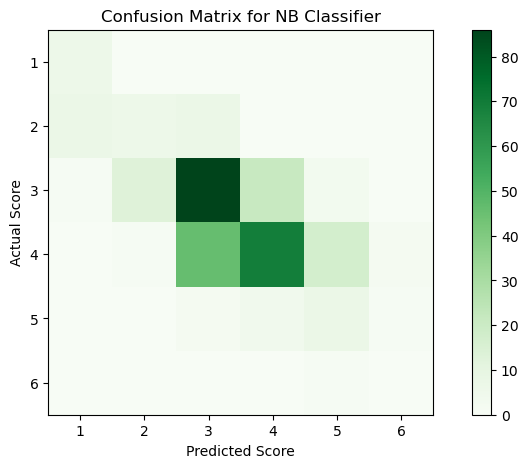

In [12]:
cm1 = confusion_matrix(data_label_test, data_predict)
plt.figure(figsize=(10, 5))
plt.imshow(cm1, cmap='Greens')
plt.colorbar()
plt.title('Confusion Matrix for NB Classifier')
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.xticks(ticks=range(6), labels=['1', '2', '3', '4', '5', '6'])
plt.yticks(ticks=range(6), labels=['1', '2', '3', '4', '5', '6'])
plt.show()

The Gaussian NB model appears to predict scores around 3 and 4 most frequently, with significant misclassification around these values. The distribution suggests that the classifier struggles with distinguishing between adjacent scores, leading to moderate accuracy but limited precision in differentiating higher and lower scores.

## Quadratic Weighted Kappa (QWK)

The Quadratic Weighted Kappa is a statistical measure used to assess the degree of agreement between two raters who assign scores to items on an ordinal scale. Its values range from -1 to 1, where -1 signifies complete disagreement, 0 indicates no better agreement than what would be expected by chance, and 1 represents perfect agreement. <br>
QWK is an extension of Cohen’s Kappa, which measures inter-rater reliability for categorical variables. However, unlike Cohen’s Kappa, QWK accounts for the ordinal nature of the categories. This means that it not only evaluates whether the raters agree but also considers the severity of disagreements. Discrepancies between ratings are weighted based on their distance, with larger differences being penalised more heavily than smaller ones. For instance, misclassifying an essay score of 6 as a 1 would be considered a more significant error than misclassifying it as a 5, and the QWK metric reflects this by assigning greater penalties to larger misclassifications. <br>
Because of its sensitivity to the ordinal structure of the data, QWK is particularly useful in fields such as automated essay scoring. By emphasizing the extent of disagreement rather than treating all disagreements equally, QWK provides a more nuanced and fair assessment of classification performance.

## QWK score for our data

Below is the code that calculates the QWK score for our dataset:

In [13]:
qwk_score = cohen_kappa_score(data_label_test, data_predict, weights="quadratic")
print(qwk_score)

0.662876784769963


It is important to note that the QWK score varies each time we train a new model. This variation occurs because the dataset is randomly split into training and test sets in each iteration. As a result, different subsets of data are used for training, leading to slight variations in model performance. To obtain a more reliable estimate of the model’s effectiveness, we could consider averaging the QWK score over multiple runs or using techniques like cross-validation to reduce variability.

## Random Forest (RF) Classifier

## What is the random forest classifier? 

Random forests is a machine learning method used for classification, regression, and other tasks. This technique builds a collection of decision trees during training, each trained on a random subset of the data. By combining the outputs of multiple trees, the model improves accuracy and reduces the risk of overfitting compared to individual decision trees. <br>
In classification tasks, each decision tree in the forest votes for a class, and the final prediction is determined by majority vote. <br>
For regression tasks, the output is typically the average of the predictions from all trees. <br>
One assumption for the RF classifier is that we are under supervised learning, meaning it require labeled data to train the model. The key advantage of this approach is that it leverages the power of multiple weak learners to produce a more robust and generalisable model. By randomly selecting subsets of data and features for each tree, random forests introduce diversity, reducing variance and improving overall model stability. <br>
This classifier method is widely used in various applications, including automated essay scoring, due to its ability to handle high-dimensional data and maintain strong predictive performance.

## Building the RF model using training data

Similar to before, the code below utilises RF to create a predictive model. This model uses the features of the dataset to predict the score of a student's essay. 

In [14]:
rf_model = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=0)
rf_model.fit(data_features_train, data_label_train)
rf_predictions = rf_model.predict(data_features_test)
rf_model.score(data_features_test, data_label_test)

0.6633333333333333

Once again, the accuracy score obtained from the model will vary each time we run the project because of the random split of the original dataframe into training and testing sets.<br>
Much like the Gaussian NB score, the closer it is to 1, the better the model’s predictions are, indicating that the model is making more accurate predictions from input features to the output scores.

## Confusion Matrix for RF Classifier

Similar to the previous NB classifier confusion matrix, the code below utilises scikit-learn's confusion matrix to visualise how well our model is performing by comparing the actual and predicted scores.

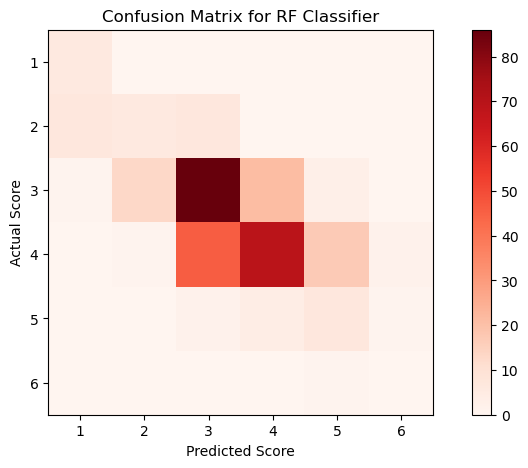

In [15]:
cm2 = confusion_matrix(data_label_test, rf_predictions)
plt.figure(figsize=(10, 5))
plt.imshow(cm1, cmap='Reds') 
plt.colorbar()
plt.title('Confusion Matrix for RF Classifier')
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.xticks(ticks=range(6), labels=['1', '2', '3', '4', '5', '6'])
plt.yticks(ticks=range(6), labels=['1', '2', '3', '4', '5', '6'])
plt.show()

Upon analysis, the RF model appears to produce predictions similar to those of the Gaussian NB model. We still observe a tendency for misclassification, particularly with adjacent scores, indicating that the model struggles to precisely distinguish between closely related score levels. This suggests that while the RF approach may offer some improvements in overall prediction stability, additional feature selection will be necessary to enhance accuracy.

## Which algorithm is better for this project?

By direct comparison of accuracy scores, we can conclude that the RF model provides higher accuracy in predicting essay scores based on the given features. The RF approach, which combines multiple decision trees, allows for more robust and reliable predictions compared to the Gaussian NB model. However, while random forests improve overall accuracy, some challenges remain, particularly in differentiating between adjacent scores.

Furthermore, a comparison of the confusion matrices reveals that both models exhibit similar prediction patterns. However, the RF model demonstrates a slight improvement, with fewer extreme misclassifications. This means that it makes fewer predictions that are significantly far from the true score. While this indicates that the RF model captures the underlying patterns in the data more effectively than the Gaussian NB model, there is still room for improvement in refining score differentiation, particularly for adjacent categories. Further optimisation, and feature selection will enhance the model’s performance even further.

## Kaggle Submission

We read the csv file as per the coursework specification:

In [16]:
unseen_data = pd.read_csv("F78DS-Essay-Features-Submission.csv")
unseen_data.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607


This dataset closely resembles the one used to build our predictive model earlier, but this time, it contains only the features, without the corresponding essay scores. We can leverage this feature data, along with the model we previously developed, to predict the essay scores based on the given features. Since we determined that the RF model provided the best results in our earlier analysis, we will proceed by using this model for our predictive analysis.

## Using the RF model we built earlier to predict scores

First of all, we must remove the "chars" column from our new data since we removed it from the model (highly correlated with "words"):

In [17]:
unseen_data_features = unseen_data.drop(columns=["chars", "punctuations"])

One last time, the code below utilises RF to create a predictive model. This model uses the features (all columns minus "chars", and "punctuations") of the new dataset to predict the score of a student's essay. 

In [18]:
rf_predictions2 = rf_model.predict(unseen_data_features)

## Output of our prediction

The code below usess Pandas to create a dataframe that only contains the feature (essayid) we want, paired with the predicted score.

In [19]:
output_df = pd.DataFrame({'essayid': unseen_data_features["essayid"], 'score': rf_predictions2})
output_df.head()  #to check before we save as csv

,essayid,score
0,1623,4
1,1143,3
2,660,3
3,1596,5
4,846,4


Then finally we can create a csv file, named correctly, so that we may submit this to Kaggle for competition.

In [20]:
output_df.to_csv("H00190287-Connor-McCaffery-11.csv", index=False)

## Conclusion

In this project, we explored machine learning techniques for automated essay scoring, focusing on model building, feature selection, and validation. By leveraging a dataset of student essays with various features, we trained and evaluated classification models to predict essay scores. <br>
<br>
Among the models tested, the Random Forest classifier demonstrated superior performance compared to the Gaussian Naive Bayes model. This result highlights the effectiveness of ensemble learning in handling feature-rich datasets. The Random Forest model achieved a higher Quadratic Weighted Kappa score, indicating better agreement with human-rated scores. Furthermore, feature selection played a critical role in improving model accuracy, emphasising the importance of identifying the most relevant attributes for prediction, however this is one point of the project that needs refinement. Cross-validation techniques ensured that our model was robust and generalisable to unseen data. Visualisations in the form of confusion matrices, provided valuable insights into classification performance and areas for improvement. <br>
<br>
Overall, this study demonstrates the potential of machine learning in automating essay scoring while underscoring the need for careful model selection and validation. Future work could explore additional feature engineering techniques, deep learning approaches, or hybrid models to further enhance predictive accuracy.